# Projeto de Série Temporal: Previsão de Demanda
## Contexto Fictício
### Vou usar conceitos e tecnologias de Ciência de Dados para prever a demanda.

# 1.Pacotes

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA



In [ ]:
 %matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel("/content/Dados.xlsx")
df.head()

     

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317


In [ ]:
# alterando o index para data
df.index = df['Data']

# ver o resultado da transformação
df.head()



,Data,Vendas
Data,,
2022-12-06,2022-12-06,870
2022-12-07,2022-12-07,868
2022-12-08,2022-12-08,1189
2022-12-09,2022-12-09,742
2022-12-10,2022-12-10,317


In [ ]:

df.columns = ['Data', 'Vendas']
df['Data'] = pd.to_datetime(df.Data)
df.set_index(df.Data, inplace = True)
df.sort_index(ascending = True, inplace = True)
df.drop('Data', axis = 1, inplace = True)
df.head()

,Vendas
Data,
2022-12-06,870
2022-12-07,868
2022-12-08,1189
2022-12-09,742
2022-12-10,317


In [ ]:
# Valores ausentes

print("""Quantos valores faltantes existem em cada variável?
Variável | Valores ausentes""")
df.isnull().sum()



Quantos valores faltantes existem em cada variável?
Variável | Valores ausentes


Vendas    0
dtype: int64

In [ ]:
# Valores duplicados

df.drop_duplicates(inplace = True)

##2.Análise de dados
Depois de tratados os dados, agora é hora de analisar os dados.

In [ ]:
# Forma do conjunto de dados
print("Numero de linhas:", df.shape[0])
print("Numero de colunas: ", df.shape[1])

Numero de linhas: 44
Numero de colunas:  1


In [ ]:
# Tipo de dados
df.dtypes

Vendas    int64
dtype: object

In [ ]:
# Valor médio de Vendas

df.Vendas.mean()

763.9090909090909

In [ ]:
# valor da mediana de Vendas

df.Vendas.median()

810.5

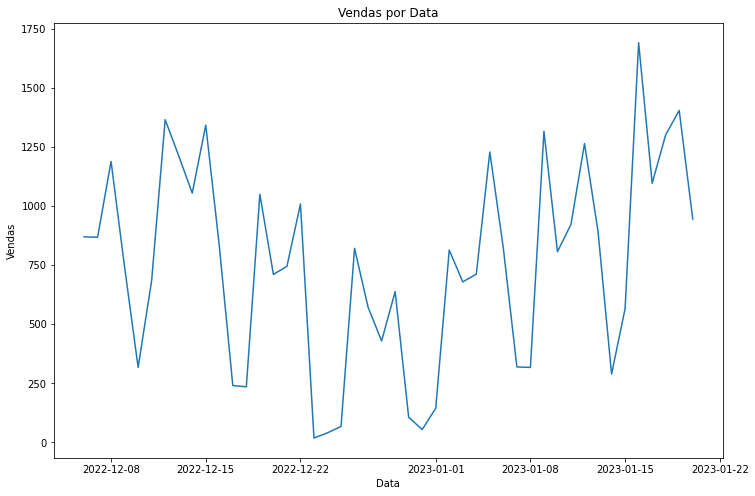

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['Data'], df['Vendas'])
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Vendas por Data')
plt.show() 

Agora é hora de fazer previsões, ou seja, prever valores para os próximos períodos.

Em statsmodels, o ARIMA pode executá-lo usando a forecast(). O principal parâmetro desta função é o número de períodos no futuro a prever.


Neste exemplo, estamos usando a biblioteca statsmodels para ajustar um modelo ARIMA (AutoRegressive Integrated Moving Average) aos dados históricos de demanda. Em seguida, usamos o modelo ajustado para fazer uma previsão para os próximos 5 dias e exibir o resultado.

In [ ]:
# carregar dados históricos 
df = pd.read_excel('/content/Dados.xlsx')

# criar modelo ARIMA
model = ARIMA(df['Vendas'], order=(1, 1, 0))

# ajustar modelo ARIMA aos dados históricos
model_fit = model.fit()

# fazer previsão para os próximos 5 dias
forecast = model_fit.forecast(steps=5)


# exibir previsão de demanda
print("Previsão de demanda para os próximos 5 dias:", forecast[0])



Previsão de demanda para os próximos 5 dias: [1033.39916571 1021.03291136 1027.18176519 1029.9285667  1033.30047717]


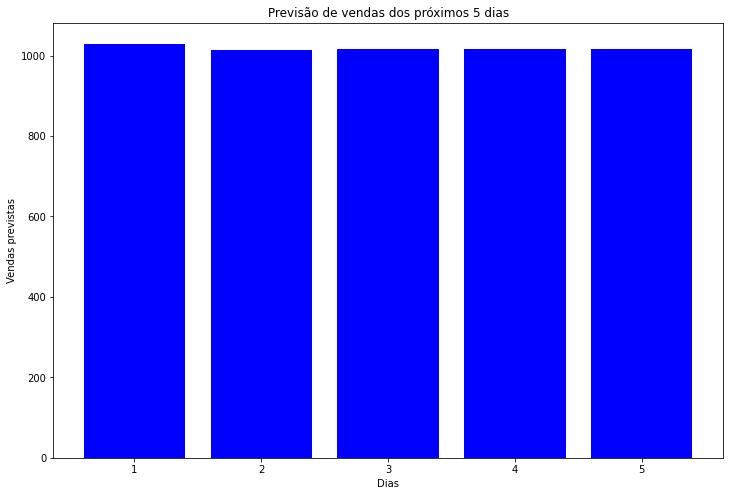

In [ ]:

# fazer previsão para os próximos 5 dias
forecast = model_fit.forecast(steps=5)

# definir os dias da previsão
days = [i+1 for i in range(5)]

# plotar gráfico de barras da previsão de vendas
plt.figure(figsize=(12,8))
plt.bar(days, forecast, color='blue')
plt.xlabel('Dias')
plt.ylabel('Vendas previstas')
plt.title('Previsão de vendas dos próximos 5 dias')
plt.show()
